In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.array([[0,2,0,0],[0,1,4,0],[0,1,1,0]])
data_raw = pd.DataFrame({'Column1':data[:,0], 'Column2':data[:,1], 'Columns3':data[:,2], 'Column4':data[:,3]})
data_raw

,Column1,Column2,Columns3,Column4
0,0,2,0,0
1,0,1,4,0
2,0,1,1,0


In [3]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
# normalize the data attributes
normalized_data = preprocessing.normalize(data)
normalized_data

array([[0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.24253563, 0.9701425 , 0.        ],
       [0.        , 0.70710678, 0.70710678, 0.        ]])

In [4]:
selector = VarianceThreshold()
featureSelected = selector.fit_transform(normalized_data)
print(featureSelected)

[[1.         0.        ]
 [0.24253563 0.9701425 ]
 [0.70710678 0.70710678]]


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names =['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length','sepal width','petal lenght','petal width']
# Separating out the features
x =df.drop('target',axis =1)
# Standarizing the features
y =df['target']
x = StandardScaler().fit_transform(x)
xdf = pd.DataFrame(x,columns =['sepal length','sepal width','petal lenght','petal width'])
xdf


,sepal length,sepal width,petal lenght,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [7]:
xdf1=pd.DataFrame(y,columns =['target'])
xdf1

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [8]:
df1 = pd.concat([xdf,xdf1[['target']]],axis=1) # concat two dataframes
df1

,sepal length,sepal width,petal lenght,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components =2)

In [11]:
#with Prinsipal Component Analysis (PCA) we reduce 4 features to 2 and it is 2 dimentional data
prinsipalComponents = pca.fit_transform(x)
prinsipalDF = pd.DataFrame(data = prinsipalComponents, columns =['Prinsipal component 1','Prinsipal component 2'])
prinsipalDF 

,Prinsipal component 1,Prinsipal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [12]:
finaldf = pd.concat([prinsipalDF,xdf1[['target']]],axis =1)
finaldf

,Prinsipal component 1,Prinsipal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


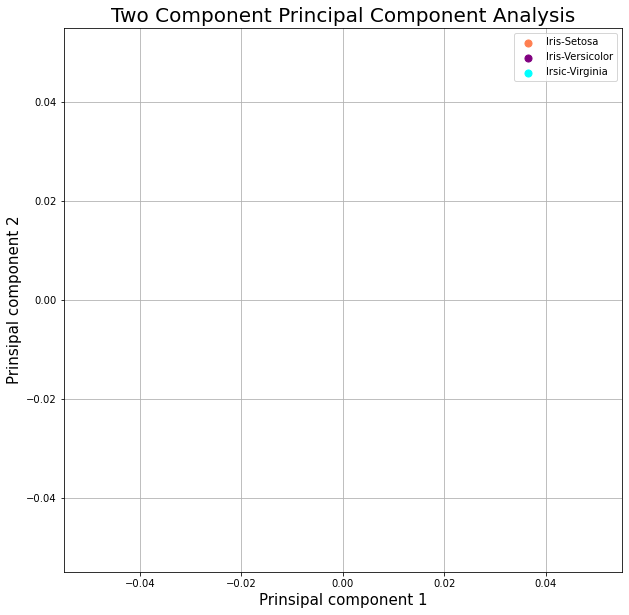

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(1,1,1)
ax.set_xlabel('Prinsipal component 1',fontsize =15)
ax.set_ylabel('Prinsipal component 2', fontsize=15)
ax.set_title('Two Component Principal Component Analysis',fontsize =20)
targets =['Iris-Setosa','Iris-Versicolor','Irsic-Virginia']
colors =['coral','purple','aqua']
for target,color in zip(targets,colors):
    IndicaseToKeeep = finaldf['target']== target
    ax.scatter(finaldf.loc[IndicaseToKeeep,'Prinsipal component 1']
              ,finaldf.loc[IndicaseToKeeep,'Prinsipal component 2']
              ,c = color
              ,s = 50)
    
    
ax.legend(targets)
ax.grid()
    

<AxesSubplot:xlabel='Prinsipal component 1', ylabel='Prinsipal component 2'>

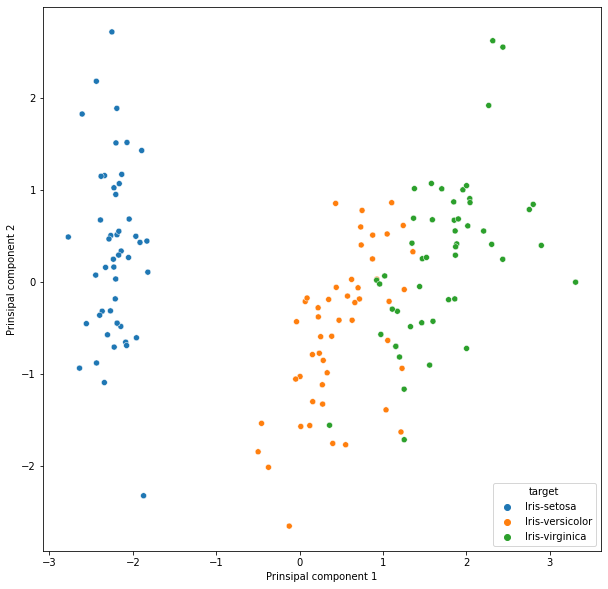

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data = finaldf,x = 'Prinsipal component 1',y ='Prinsipal component 2',hue= 'target')

In [18]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.72770452, 0.23030523])

In [19]:
totalVariacce = variance_ratio[0] + variance_ratio[1]
totalVariacce

0.9580097536148199